In [2]:
from decision_tree import *
import matplotlib.pyplot as plt
import pandas as pd
import random

data_values = [
    ['Shortbread',0.15,0.2],
        ['Shortbread',0.15,0.3],
        ['Shortbread',0.2,0.25],
        ['Shortbread',0.25,0.4],
        ['Shortbread',0.3,0.35],
        ['Sugar',0.05,0.25],
        ['Sugar',0.05,0.35],
        ['Sugar',0.1,0.3],
        ['Sugar',0.15,0.4],
        ['Sugar',0.25,0.35]]


In [3]:
#1 implement the exercise above
tree_one = DecisionTree(data_values, 10, 1)
for nodes in tree_one.nodes:
    print('path',nodes.path)
    #print('points in node', nodes.data_points)
    #print('node class:', nodes.prediction)
    #print()

path []
path [['x', '<=', 0.125]]
path [['x', '>', 0.125]]
path [['x', '>', 0.125], ['y', '<=', 0.32499999999999996]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996], ['x', '<=', 0.2]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996], ['x', '>', 0.2]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996], ['x', '>', 0.2], ['y', '<=', 0.375]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996], ['x', '>', 0.2], ['y', '>', 0.375]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996], ['x', '>', 0.2], ['y', '<=', 0.375], ['x', '<=', 0.275]]
path [['x', '>', 0.125], ['y', '>', 0.32499999999999996], ['x', '>', 0.2], ['y', '<=', 0.375], ['x', '>', 0.275]]


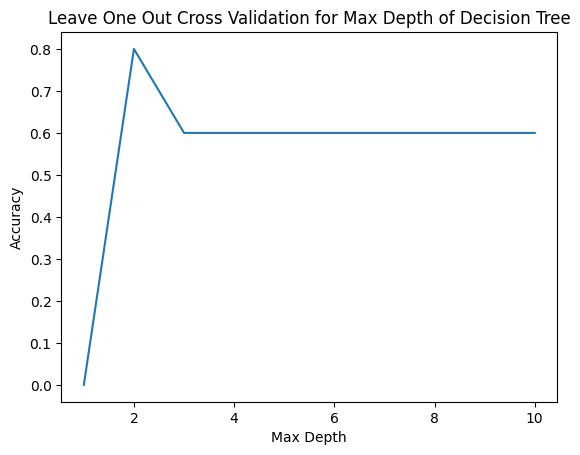

In [4]:
#2. leave one out cross validation curve for max depth
leave_out_max_dict = {}

for max_depth in range(1, 11): 
    leave_out_max_dict[max_depth] = 0

    for i in range(len(data_values)): 

        current_point = data_values[i]
        current_point_classification = current_point[0]
        data_values.pop(i)

        tree_two = DecisionTree(data_values, max_depth, 1)
        prediction = tree_two.predict(current_point[1:])

        if prediction == current_point_classification:
            leave_out_max_dict[max_depth] += 1

        data_values.insert(i, current_point)

max_depths = [i for i in range(1, 11)]
max_accuracy = [leave_out_max_dict[i]/(len(data_values)) for i in range(1, 11)]

plt.plot(max_depths, max_accuracy)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Leave One Out Cross Validation for Max Depth of Decision Tree')
plt.show()


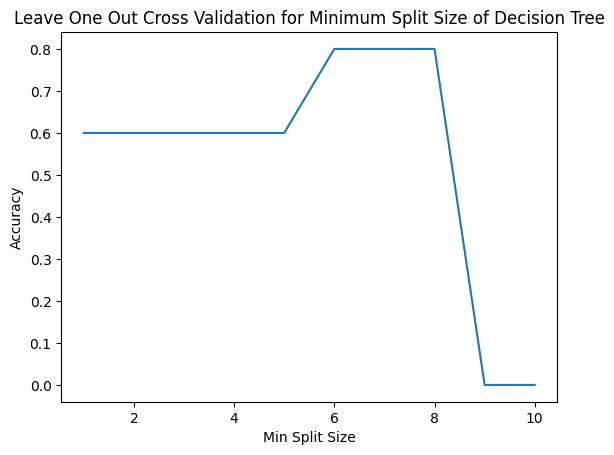

In [5]:
#3. leave one out cross validation curve for min split size

leave_out_min_dict = {}

for min_size in range(1, 11):
    leave_out_min_dict[min_size] = 0

    for i in range(len(data_values)): 
        current_point_m = data_values[i]
        current_point_classification = current_point_m[0]

        data_values.pop(i)

        tree_three = DecisionTree(data_values, 10, min_size)
        prediction = tree_three.predict(current_point_m[1:])

        if prediction == current_point_classification:
            leave_out_min_dict[min_size] += 1
                
        data_values.insert(i, current_point_m)

min_split_sizes = [i for i in range(1, 11)]
min_accuracy = [leave_out_min_dict[i]/(len(data_values)) for i in range(1, 11)]

plt.plot(min_split_sizes, min_accuracy)
plt.xlabel('Min Split Size')
plt.ylabel('Accuracy')
plt.title('Leave One Out Cross Validation for Minimum Split Size of Decision Tree')
plt.show()


        


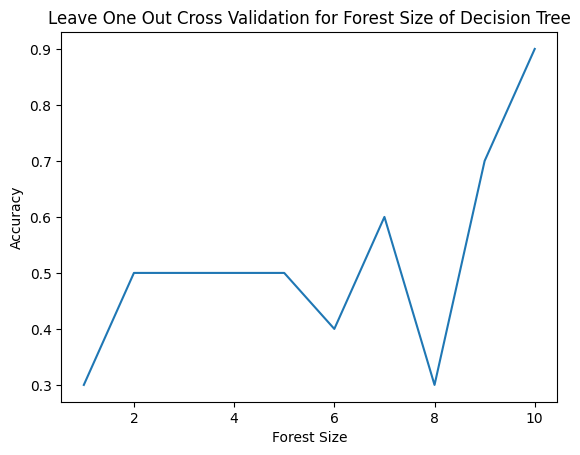

In [230]:
#4 leave one out cross validation for forest size

leave_one_out_forest_dict = {}

for num_trees in range(1, 11): 
    leave_one_out_forest_dict[num_trees] = 0

    for i in range(len(data_values)): 
        current_point = data_values[i]
        current_point_classification = current_point[0]

        data_values.pop(i)

        random_sample = random.sample(data_values, 5)
        forest = [DecisionTree(random_sample, 10, 1) for i in range(num_trees)]
        predictions = [tree.predict(current_point[1:]) for tree in forest]
        prediction = max(set(predictions), key=predictions.count)

        if prediction == current_point_classification:
            leave_one_out_forest_dict[num_trees] += 1

        data_values.insert(i, current_point)


forest_sizes = [i for i in range(1, 11)]
forest_accuracy = [leave_one_out_forest_dict[i]/(len(data_values)) for i in range(1, 11)]

plt.plot(forest_sizes, forest_accuracy)
plt.xlabel('Forest Size')
plt.ylabel('Accuracy')
plt.title('Leave One Out Cross Validation for Forest Size of Decision Tree')
plt.show()



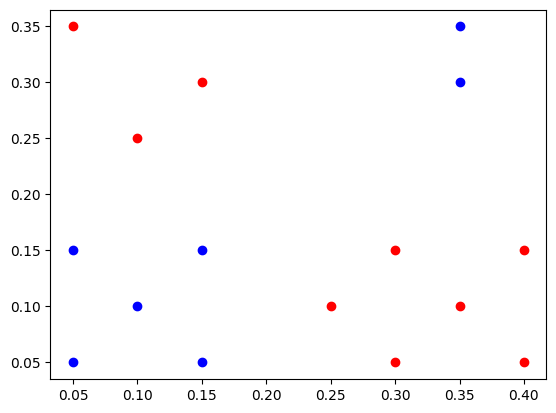

path []
path [['x', '<=', 0.2]]
path [['x', '>', 0.2]]
path [['x', '>', 0.2], ['y', '<=', 0.22499999999999998]]
path [['x', '>', 0.2], ['y', '>', 0.22499999999999998]]
path [['x', '<=', 0.2], ['y', '<=', 0.2]]
path [['x', '<=', 0.2], ['y', '>', 0.2]]


In [7]:
#5 Construct a data set that leads to a decision tree that looks like the one below (7 nodes total)
#         root depth 
#       /      \
#   child       child 
#  /     \     /     \
#child child  child child

five_data_values = [
['Shortbread', 0.05, 0.35],
['Shortbread', 0.1, 0.25],
['Shortbread', 0.15, 0.3],
['Shortbread', 0.25, 0.1],
['Shortbread', 0.3, 0.05],
['Shortbread', 0.3, 0.15],
['Shortbread', 0.35, 0.1],
['Shortbread', 0.4, 0.15],
['Shortbread', 0.4, 0.05],
['Sugar', 0.05, 0.05],
['Sugar', 0.05, 0.15],
['Sugar', 0.1, 0.1],
['Sugar', 0.15, 0.05],
['Sugar', 0.15, 0.15],
['Sugar', 0.35, 0.3],
['Sugar', 0.35, 0.35]
]

shortbread_x = [point[1] for point in five_data_values if point[0] == 'Shortbread']
shortbread_y = [point[2] for point in five_data_values if point[0] == 'Shortbread']

sugar_x = [point[1] for point in five_data_values if point[0] == 'Sugar']
sugar_y = [point[2] for point in five_data_values if point[0] == 'Sugar']

plt.scatter(shortbread_x,shortbread_y,color='red')
plt.scatter(sugar_x,sugar_y,color='blue')
plt.show()


tree_five = DecisionTree(five_data_values, 10,1)

for nodes in tree_five.nodes: 
    print('path',nodes.path)
    #print('points in node', nodes.data_points)
    #print('node class:', nodes.prediction)
    #print()

assert len(tree_five.nodes) == 7

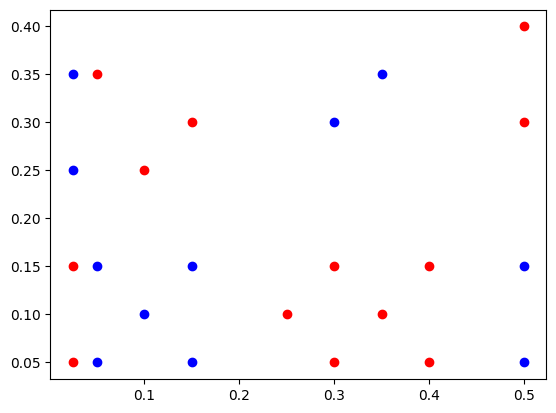

path []
path [['x', '<=', 0.2]]
path [['x', '>', 0.2]]
path [['x', '>', 0.2], ['y', '<=', 0.22499999999999998]]
path [['x', '>', 0.2], ['y', '>', 0.22499999999999998]]
path [['x', '>', 0.2], ['y', '>', 0.22499999999999998], ['x', '<=', 0.425]]
path [['x', '>', 0.2], ['y', '>', 0.22499999999999998], ['x', '>', 0.425]]
path [['x', '>', 0.2], ['y', '<=', 0.22499999999999998], ['x', '<=', 0.45]]
path [['x', '>', 0.2], ['y', '<=', 0.22499999999999998], ['x', '>', 0.45]]
path [['x', '<=', 0.2], ['y', '<=', 0.2]]
path [['x', '<=', 0.2], ['y', '>', 0.2]]
path [['x', '<=', 0.2], ['y', '>', 0.2], ['x', '<=', 0.037500000000000006]]
path [['x', '<=', 0.2], ['y', '>', 0.2], ['x', '>', 0.037500000000000006]]
path [['x', '<=', 0.2], ['y', '<=', 0.2], ['x', '<=', 0.037500000000000006]]
path [['x', '<=', 0.2], ['y', '<=', 0.2], ['x', '>', 0.037500000000000006]]


In [8]:
#6 Construct a data set that leads to a decision tree that looks like the one below (15 nodes total)
#                     root.              
#                   /      \
#              child         child       
#            /       \     /       \
#       child      child  child     child     
#       /   \      /   \  /   \     /   \
#   child child child child child child child.  

six_data_values = [
['Shortbread', 0.025, 0.05],
['Shortbread', 0.025, 0.15],
['Shortbread', 0.05, 0.35],
['Shortbread', 0.1, 0.25],
['Shortbread', 0.15, 0.3],
['Shortbread', 0.25, 0.1],
['Shortbread', 0.3, 0.05],
['Shortbread', 0.3, 0.15],
['Shortbread', 0.35, 0.1],
['Shortbread', 0.4, 0.15],
['Shortbread', 0.4, 0.05],
['Sugar', 0.025, 0.25],
['Sugar', 0.025, 0.35],
['Sugar', 0.05, 0.05],
['Sugar', 0.05, 0.15],
['Sugar', 0.1, 0.1],
['Sugar', 0.15, 0.05],
['Sugar', 0.15, 0.15],
['Sugar', 0.3, 0.3],
['Sugar', 0.35, 0.35],
['Sugar', 0.5, 0.05],
['Sugar', 0.5, 0.15],
['Shortbread', 0.5, 0.3],
['Shortbread', 0.5, 0.4]

]

shortbread_x = [point[1] for point in six_data_values if point[0] == 'Shortbread']
shortbread_y = [point[2] for point in six_data_values if point[0] == 'Shortbread']

sugar_x = [point[1] for point in six_data_values if point[0] == 'Sugar']
sugar_y = [point[2] for point in six_data_values if point[0] == 'Sugar']

plt.scatter(shortbread_x,shortbread_y,color='red')
plt.scatter(sugar_x,sugar_y,color='blue')
plt.show()

tree_six = DecisionTree(six_data_values, 10,1)

for nodes in tree_six.nodes: 
    print('path',nodes.path)
    #print('points in node', nodes.data_points)
    #print('node class:', nodes.prediction)
    #print()

assert len(tree_six.nodes) == 15
